### Assignment 3: Flowtraders

Group 6:
Dorota
Neža

In [1]:
import pandas_datareader.data as web
import pandas as pd
import datetime as dt
from datetime import datetime
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

#### 1. Read in the data in the midpoint model training file
- Use a library like Pandas in python to read “Bond_MidModelTraining.csv”
- Check whether the dataset is correctly ordered by epochhours

In [4]:
df = os.path.join('Data','Bond_MidModelTraining.csv')
df_data= pd.read_csv(df)

In [5]:
df_data

,epochhours,last_price,firm_executable_bid,firm_executable_ask,market_estimate_bid,market_estimate_ask
0,1603087200,NaN,NaN,NaN,122.314000,122.941544
1,1603087200,NaN,122.335739,122.960435,NaN,NaN
2,1603090800,NaN,122.374000,122.994429,NaN,NaN
3,1603090800,NaN,NaN,NaN,122.288552,122.912063
4,1603094400,NaN,NaN,NaN,122.386577,123.009203
...,...,...,...,...,...,...
2041,1613952000,NaN,NaN,NaN,123.190000,123.821000
2042,1613973600,NaN,122.819000,123.176000,NaN,NaN
2043,1613977200,NaN,NaN,NaN,123.099345,123.642185
2044,1613977200,NaN,123.247480,123.602380,NaN,NaN


In [6]:
df_data.sort_values(by=['epochhours'], inplace=True)
df_data

,epochhours,last_price,firm_executable_bid,firm_executable_ask,market_estimate_bid,market_estimate_ask
0,1603087200,NaN,NaN,NaN,122.314000,122.941544
1,1603087200,NaN,122.335739,122.960435,NaN,NaN
2,1603090800,NaN,122.374000,122.994429,NaN,NaN
3,1603090800,NaN,NaN,NaN,122.288552,122.912063
4,1603094400,NaN,NaN,NaN,122.386577,123.009203
...,...,...,...,...,...,...
2041,1613952000,NaN,NaN,NaN,123.190000,123.821000
2042,1613973600,NaN,122.819000,123.176000,NaN,NaN
2044,1613977200,NaN,123.247480,123.602380,NaN,NaN
2043,1613977200,NaN,NaN,NaN,123.099345,123.642185


#### 2. The data consists of Last prices (from actual trades), firm executable dealer quotes, and market estimate for bond bid and offer. 
Create two new variables midDealerQuotes and midMarketEstimate as (ask +bid)/2 for firm
dealer quotes and market estimate prices respectively.

In [18]:
df_data1=df_data.assign(midDealerQuotes=lambda x: (x.firm_executable_bid+x.firm_executable_ask) / 2, 
               midMarketEstimate=lambda x: (x.market_estimate_bid+x.market_estimate_ask) / 2 )

In [19]:
df_data1

,epochhours,last_price,firm_executable_bid,firm_executable_ask,market_estimate_bid,market_estimate_ask,midDealerQuotes,midMarketEstimate
0,1603087200,NaN,NaN,NaN,122.314000,122.941544,NaN,122.627772
1,1603087200,NaN,122.335739,122.960435,NaN,NaN,122.648087,NaN
2,1603090800,NaN,122.374000,122.994429,NaN,NaN,122.684214,NaN
3,1603090800,NaN,NaN,NaN,122.288552,122.912063,NaN,122.600308
4,1603094400,NaN,NaN,NaN,122.386577,123.009203,NaN,122.697890
...,...,...,...,...,...,...,...,...
2041,1613952000,NaN,NaN,NaN,123.190000,123.821000,NaN,123.505500
2042,1613973600,NaN,122.819000,123.176000,NaN,NaN,122.997500,NaN
2044,1613977200,NaN,123.247480,123.602380,NaN,NaN,123.424930,NaN
2043,1613977200,NaN,NaN,NaN,123.099345,123.642185,NaN,123.370765


#### 3. 
Make sure to forward fill the NA’s/gaps to ensure you have the most recent updates of midDealerQuotes and
midMarketEstimate quotes at time of LastPrice updates. Then filter on LastPrice updates only removing all other
updates from your dataset.

In [20]:
df_data1.last_price.fillna(df_data1.midDealerQuotes, inplace=True)

In [21]:
df_data1.last_price.fillna(df_data1.midMarketEstimate, inplace=True)

In [24]:
df_data1.isna().sum()

epochhours                0
last_price                0
firm_executable_bid    1127
firm_executable_ask    1127
market_estimate_bid     979
market_estimate_ask     979
midDealerQuotes        1127
midMarketEstimate       979
dtype: int64

In [25]:
df_data1

,epochhours,last_price,firm_executable_bid,firm_executable_ask,market_estimate_bid,market_estimate_ask,midDealerQuotes,midMarketEstimate
0,1603087200,122.627772,NaN,NaN,122.314000,122.941544,NaN,122.627772
1,1603087200,122.648087,122.335739,122.960435,NaN,NaN,122.648087,NaN
2,1603090800,122.684214,122.374000,122.994429,NaN,NaN,122.684214,NaN
3,1603090800,122.600308,NaN,NaN,122.288552,122.912063,NaN,122.600308
4,1603094400,122.697890,NaN,NaN,122.386577,123.009203,NaN,122.697890
...,...,...,...,...,...,...,...,...
2041,1613952000,123.505500,NaN,NaN,123.190000,123.821000,NaN,123.505500
2042,1613973600,122.997500,122.819000,123.176000,NaN,NaN,122.997500,NaN
2044,1613977200,123.424930,123.247480,123.602380,NaN,NaN,123.424930,NaN
2043,1613977200,123.370765,NaN,NaN,123.099345,123.642185,NaN,123.370765


#### 4. Make a plot of epochhours vs LastPrice, midDealerQuotes, midMarketEstimate to see what the data looks like
and whether you have weird outliers etc.

<AxesSubplot:xlabel='epochhours'>

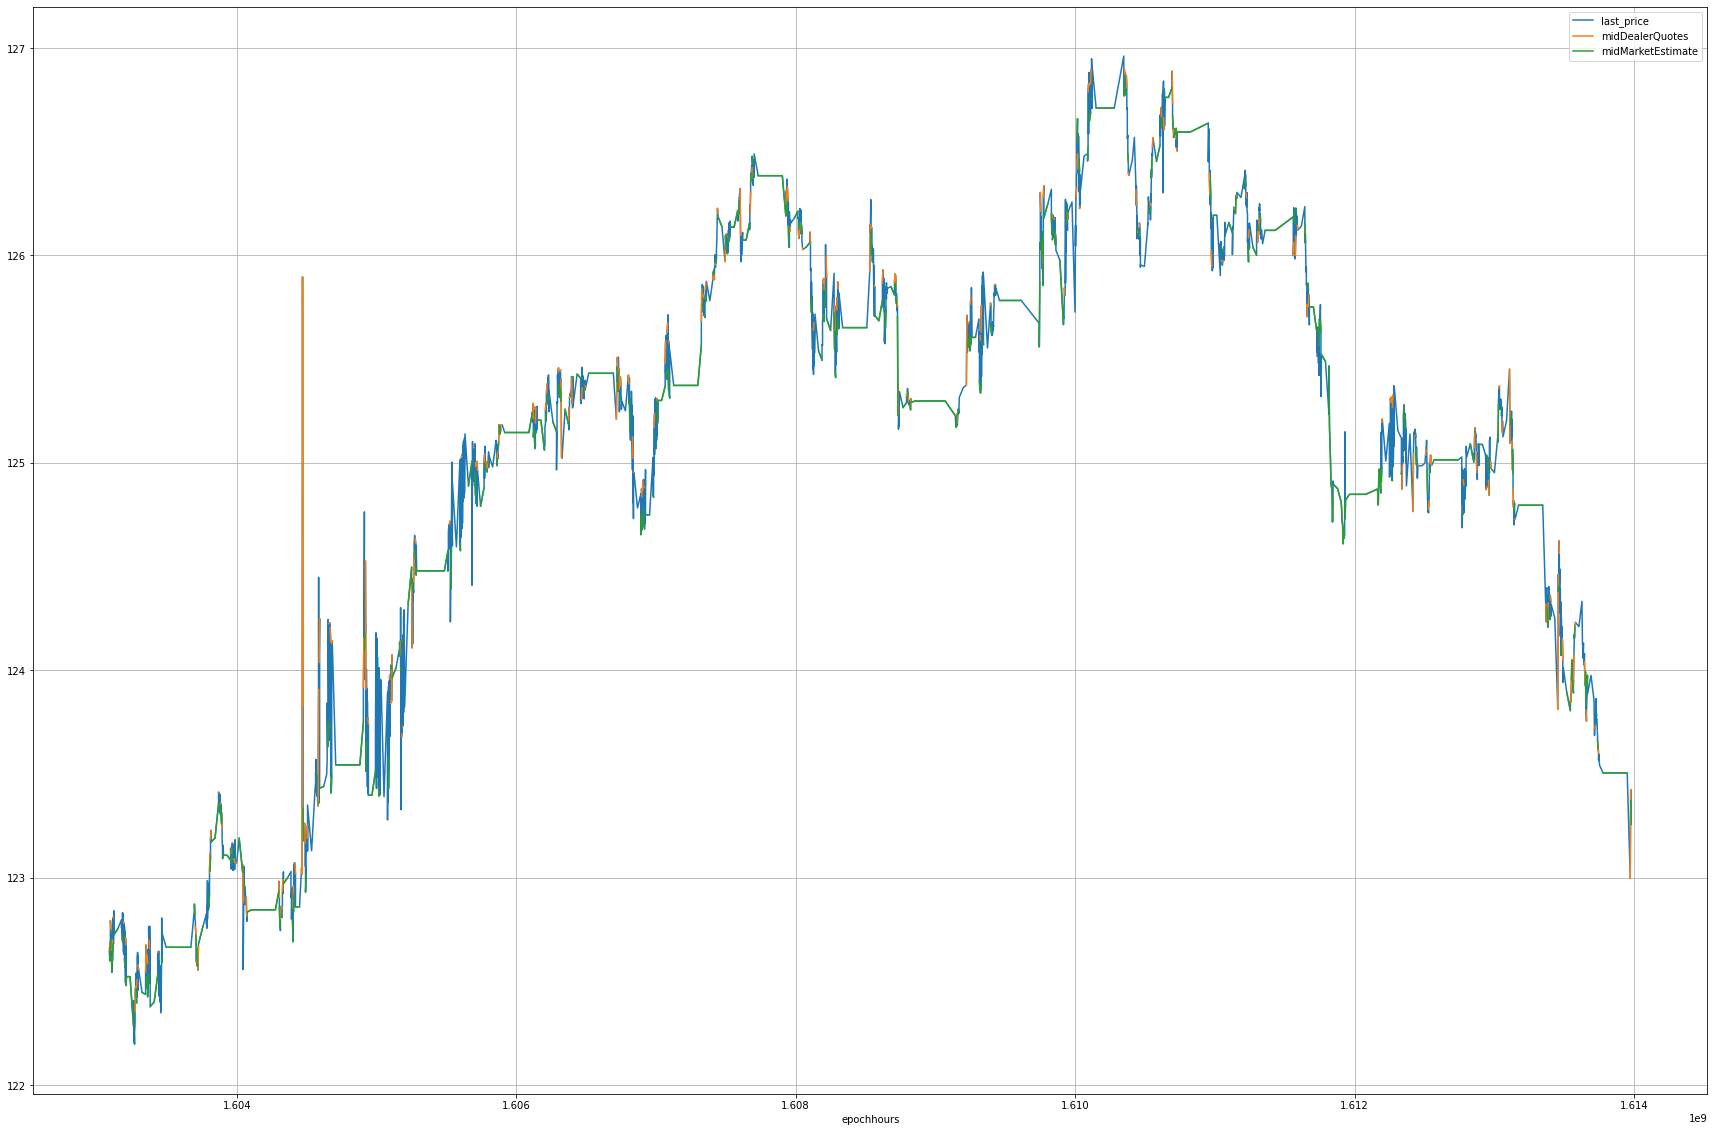

In [33]:
df_data1.plot(x='epochhours', y=['last_price', 'midDealerQuotes', 'midMarketEstimate'], figsize=(30,20), grid=True)

One huge outliere in the midDealers quote, for the time idk hahah

#### 5. Transform all 3 variable prices into returns as ((price t+1/price t) -1) ∗ 10000. You can do this by a for loop, or better
using a Python function if you can find one.

#### 6. Make a linear regression model that measures the relationship between LastPrice return vs midDealerQuotes
and midMarketEstimate returns. This will help you predict where the next LastPrice will be by looking at how
midDealerQuotes and midMarketEstimate moved since most recent LastPrice. You can use closed form solution
matrix algebra (𝑋’𝑋)'-1 𝑋’𝑌 with numpy/pandas or use a built-in function from scikit or statsmodels package for
Python.

#### 7. Evaluate the performance using R-squared and Absolute Error

#### 8. This is the creative part of the assignment. Open the “Bond_QuoteLive.csv” file
- We want FlowTradersMidpoint to be an estimate of where the next LastPrice will be. Using the model
created previously and the data you see for LastPrice, midDealerQuotes, and midMarketEstimate: Can
you fill in the missing values for FlowTradersMidpoint column. Can you think of different variables and
regression specifications that improve the forecast?
- FlowTradesOffer is usually 0.10% higher than FlowTradersMidpoint and FlowTradesBid is usually 0.10%
lower than FlowTradersMidpoint: Can you fill in the missing values for FlowTradesBid and
FlowTradesAsk columns?
- If we have a data-driven long-term strategy that tells us that the bond is expected to move higher over
the next few days by 1%. Do you think FlowTradesBid and FlowTradesAsk should change? if yes, how? if
not, why not?
- What if our long-term strategy was not indicating any move? Instead, we have a 1,000,000eur long
position in the bond and risk informed us that the maximum we can be long is 1,250,000eur. Do you
think FlowTradesBid and FlowTradesAsk should change? if yes, how? if not, why not?